# Trees, random forests, and boosting

We investigate in this notebook how methods based on trees perform for a regression problem (on the 'bike sharing' data set already encountered in the notebook on linear regression).

**There are 6 questions to answer. Only the part on trees is due for Apr. 3rd, 2024 (the part on boosting will be for Apr. 8th).**

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

# set up the random number generator: given seed for reproducibility, None otherwise
# (see https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.default_rng)
my_seed = 1
rng = np.random.default_rng(seed=my_seed) 

## Dataset

We re-use the 'bike sharing' data set, used for linear regression. We therefore do not further comment this example, and directly build the test and train sets.

In [57]:
df = pd.read_csv('BikeSharingDataset.csv')
df.drop(['instant','dteday','temp','casual','registered'],axis=1,inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    int64  
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    int64  
 7   atemp       731 non-null    float64
 8   hum         731 non-null    float64
 9   windspeed   731 non-null    float64
 10  cnt         731 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.229270,0.436957,0.186900,1600


In [58]:
# randomly splitting between test and train data
fraction_train = 0.7 
fraction_test = 1.0 - fraction_train
df_train, df_test = train_test_split(df, train_size = fraction_train, test_size = fraction_test)

In [59]:
# the aim is to predict the last column from the previous ones
X_train = df_train[df_train.columns[:-1]]
y_train = df_train["cnt"]
print("Train set")
X_train.head()

Train set


,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed
710,4,1,12,0,2,1,2,0.338363,0.596667,0.296037
463,2,1,4,0,0,0,1,0.492425,0.275833,0.232596
318,4,0,11,0,2,1,2,0.507579,0.688750,0.199633
421,1,1,2,0,0,0,1,0.268308,0.410000,0.205229
264,3,0,9,0,4,1,2,0.554963,0.902083,0.128125


In [60]:
# construction of the test set
X_test = df_test[df_test.columns[:-1]]
y_test = df_test["cnt"]
print("Test set")
X_test.head()

Test set


,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed
167,2,0,6,0,5,1,1,0.600383,0.735833,0.143029
396,1,1,2,0,3,1,1,0.466538,0.507917,0.189067
44,1,0,2,0,1,1,1,0.398350,0.375833,0.417908
465,2,1,4,0,2,1,1,0.436233,0.435000,0.249375
677,4,1,11,0,4,1,1,0.341891,0.333478,0.347835


## Decision trees

We start by performing regression with a single tree. See https://scikit-learn.org/stable/modules/tree.html for a presentation of trees in Scikit-learn (in particular practical tips in Section 1.10.5, including elements on how to avoid overfitting), as well as https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html for a description of the various functions in the class.

In [61]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

The key parameters to avoid overfitting are
- *max_depth* to limit the maximal depth of the tree
- *min_samples_leaf* to ask for a minimal number of data points for a condition to be satisfied
We start by playing around with a few values of these parameters to get a feeling of what is done/obtained.

**Question 1.** Complete the code below to perform the desired prediction.

MSE (test): 781860.6982220944
R2  (test): 0.8017448349822947


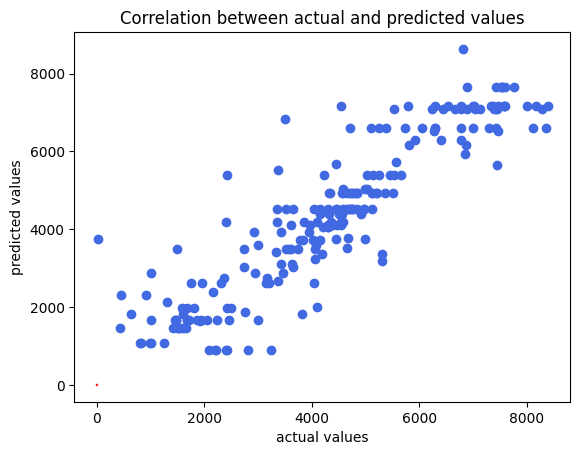

In [62]:
# choice of parameters 
chosen_max_depth = 7
chosen_min_samples_leaf = 2

# constructing + fitting the model and making the prediction
dt = DecisionTreeRegressor(max_depth=chosen_max_depth, min_samples_leaf=chosen_min_samples_leaf, random_state=my_seed) 
model = dt.fit(X_train,y_train)
y_pred = model.predict(X_test)

# computing the performance on the test set
# MSE between prediction and true values
mse = mean_squared_error(y_pred,y_test)
print('MSE (test):',mse) 
# coefficient of determination for the regression
R2 = dt.score(X_test,y_test)
print('R2  (test):',R2)
# plotting predicted values as a function of true values to graphically assess the quality of regression
plt.title('Correlation between actual and predicted values')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.scatter(y_test,y_pred,color='royalblue')
plt.plot([0,1],[0,1],color='red')
plt.show()

We can visualize the tree that was learnt using the function **plot_tree** (see https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html).

Number of data points :  511
X[ 0 ] =  season
X[ 1 ] =  yr
X[ 2 ] =  mnth
X[ 3 ] =  holiday
X[ 4 ] =  weekday
X[ 5 ] =  workingday
X[ 6 ] =  weathersit
X[ 7 ] =  atemp
X[ 8 ] =  hum
X[ 9 ] =  windspeed
X[ 10 ] =  cnt


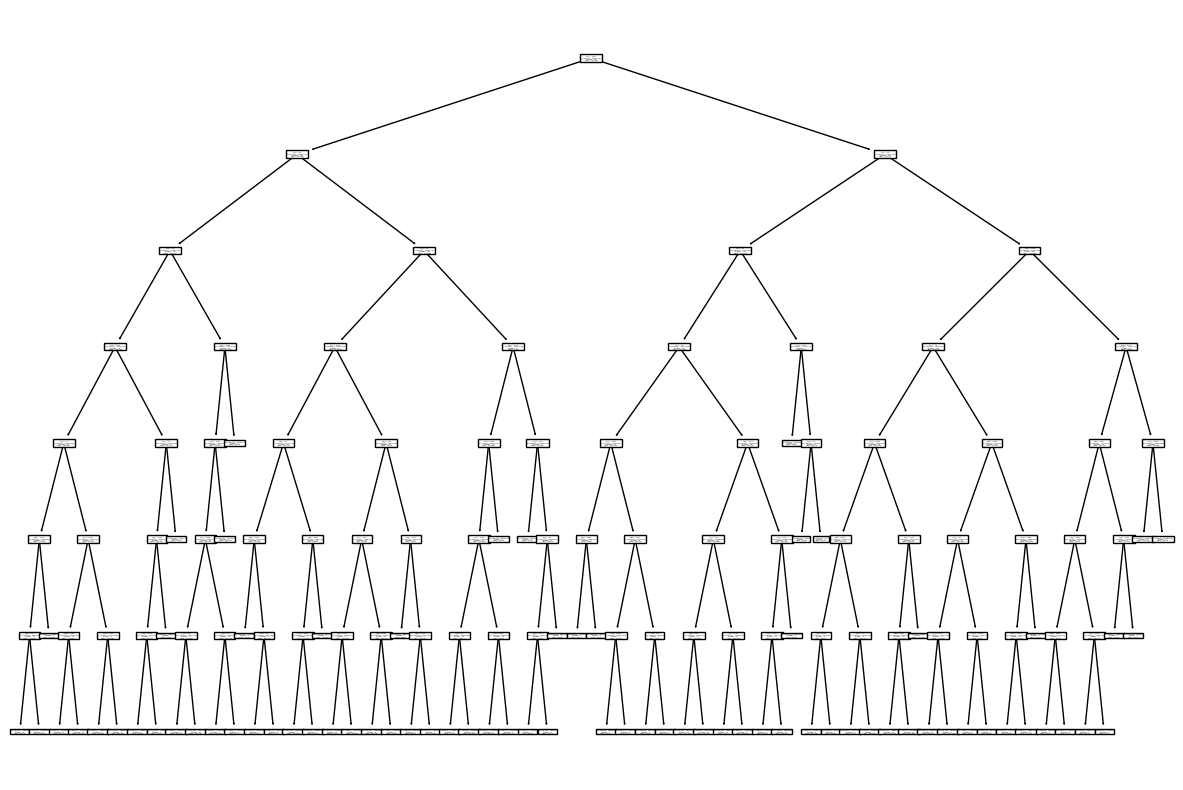

In [63]:
from sklearn import tree
print('Number of data points : ',y_train.shape[0])
for pair in zip(df_train.columns, np.arange(df_train.shape[0])):
  print('X[',pair[1],'] = ', pair[0]) 
plt.figure(figsize=(15, 10))
tree.plot_tree(dt)
plt.show()

**Question 2.** For a minimal number of samples at leaves of 10, what is the best tree depth that you find, and the associated errors? What do you think of these results? 

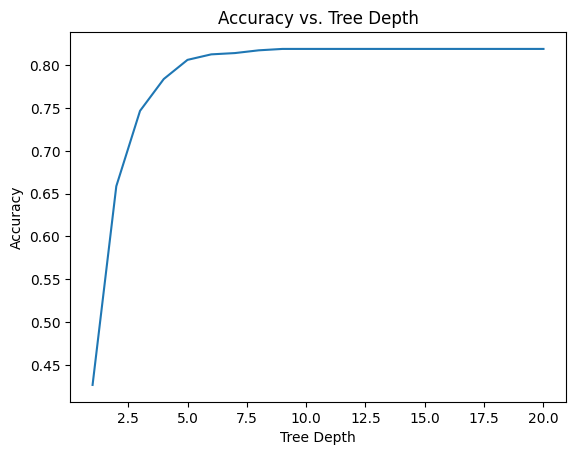

Best tree depth: 9
Best accuracy: 0.8191094629881346


In [64]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# Define the range of tree depths to test
tree_depths = np.arange(1, 21)

# Initialize an empty list to store the accuracies
accuracies = []

# Iterate over the tree depths
for depth in tree_depths:
    dt = DecisionTreeRegressor(max_depth=depth, min_samples_leaf=10, random_state=my_seed)
    model = dt.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    # Compute the accuracy of the model with R2 (test)
    accuracy = dt.score(X_test,y_test)
    
    # Append the accuracy to the list
    accuracies.append(accuracy)

# Plot the accuracies
plt.plot(tree_depths, accuracies)
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Tree Depth')
plt.show()

print('Best tree depth:', tree_depths[np.argmax(accuracies)])
print('Best accuracy:', accuracies[np.argmax(accuracies)])


We next explore more systematically the choice of the parameters by cross validation.

In [65]:
dt = DecisionTreeRegressor()
dt_params = {'max_depth':np.arange(1,10),'min_samples_leaf':np.arange(5,20)}

**Question 3.** Complete the code below to find the best hyperparameters for the model and then retrain the corresponding model and compute the associated outputs.

In [66]:
# the output (best parameters) is in the 'dict' format = dictionary
from sklearn.model_selection import GridSearchCV
print('Grid search to find optimal parameters')
gs_dt = GridSearchCV(dt, dt_params)
gs_dt.fit(X_train,y_train)
a = gs_dt.best_params_ # BEST PARAMETERS, see attributes of grid search class
print('- Best maximal depth =', a['max_depth'])
print('- Best minimal number of samples in the leaves = ',a['min_samples_leaf'],'\n')

Grid search to find optimal parameters
- Best maximal depth = 9
- Best minimal number of samples in the leaves =  6 



MSE (test): 751548.0179630336
R2  (test): 0.8094311727667038


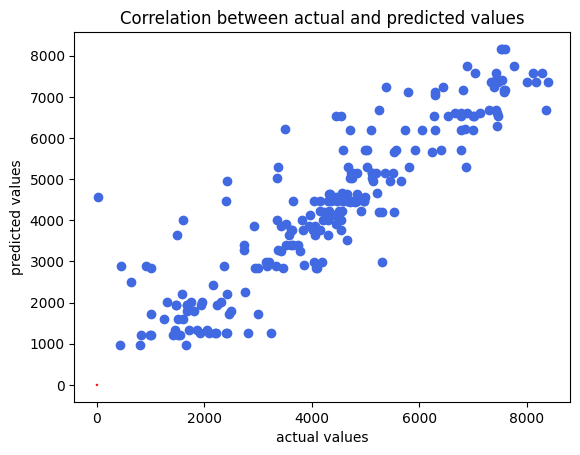

In [67]:
# training with best parameters
dt_final = DecisionTreeRegressor(max_depth=a['max_depth'], min_samples_leaf=a['min_samples_leaf'], random_state=my_seed)
model = dt_final.fit(X_train,y_train)
y_pred = model.predict(X_test)

# computing the performance on the test set
# MSE between prediction and true values
mse = mean_squared_error(y_pred,y_test)
print('MSE (test):',mse) 
# coefficient of determination for the regression
R2 = dt_final.score(X_test,y_test)
print('R2  (test):',R2)
# plotting predicted values as a function of true values to graphically assess the quality of regression
plt.title('Correlation between actual and predicted values')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.scatter(y_test,y_pred,color='royalblue')
plt.plot([0,1],[0,1],color='red')
plt.show()

**Question 4.** Is the value better than the one found manually above? Do the values found by cross validation change a lot if one does another test/train split?

No, with the one found manually (```'max_depth' = 9``` and ```'min_samples_leaf' = 10```), we had an accuracy R2 (test) of **0.8191** whereas with the cross validation (```'max_depth' = 9``` and ```'min_samples_leaf' = 6```) , we had an accuracy R2 (test) of **0.8094**.

The values found by cross-validation can vary if a different test/train split is performed. Cross-validation is a technique that helps to assess the model's performance by splitting the data into multiple subsets and evaluating the model on each subset. Each subset serves as both a training and testing set. Therefore, the performance metrics obtained from cross-validation can vary depending on the specific data points included in each subset.

## Random forests

The test error of decision trees alone is not good. It is much better to combine regression trees into random forest (see https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).

In [70]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

Here as well, we will find the best parameters for *RandomForestRegressor* by cross validation. The key parameters to set are 
- *n_estimators* which is the number of trees in the forest
- *max_depth* and *min_sample_leaf* which are the same parameters as for decision trees

**Question 5.** Fit the best model with the hyperparameters found by cross validation, and compare its predictive performance to the one found with a single tree.

In [73]:
rf_params = {'n_estimators':np.arange(25,150,25),'max_depth':np.arange(1,11,2),'min_samples_leaf':np.arange(2,15,3)}
print('Grid search to find optimal parameters')
gs_rf = GridSearchCV(rf, rf_params)
gs_rf.fit(X_train,y_train)
b = gs_rf.best_params_ # TO COMPLETE, best parameters
print('- Best number of trees = ',b['n_estimators'])
print('- Best maximal depth =', b['max_depth'])
print('- Best minimal number of samples in the leaves = ',b['min_samples_leaf'],'\n')

Grid search to find optimal parameters
- Best number of trees =  100
- Best maximal depth = 9
- Best minimal number of samples in the leaves =  2 



In [74]:
# fitting the model with best params
RF = RandomForestRegressor(n_estimators=b['n_estimators'],max_depth=b['max_depth'],min_samples_leaf=b['min_samples_leaf']) # TO COMPLETE
model = RF.fit(X_train,y_train)
y_pred = model.predict(X_test)

R2  (test): 0.8568230308850401
MSE (test): 564648.3158789255


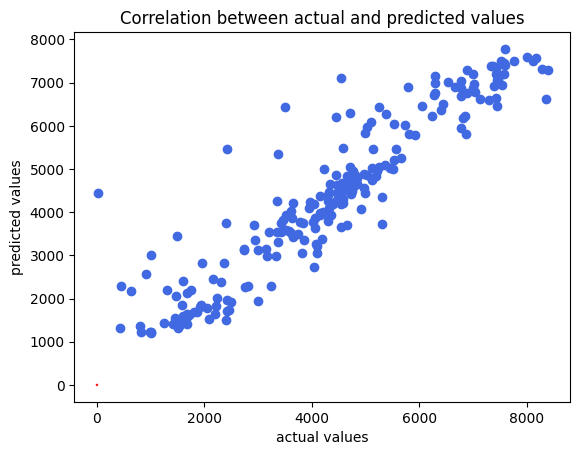

In [75]:
# compute the performance on the test set
R2 = RF.score(X_test,y_test)
print('R2  (test):',R2)
mse = mean_squared_error(y_pred,y_test)
print('MSE (test):',mse) 
plt.title('Correlation between actual and predicted values')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.scatter(y_test,y_pred,color='royalblue')
plt.plot([0,1],[0,1],color='red')
plt.show()

We have a better accuracy with the **Random Forest Regressor**: the accuracy R2 (test) is now **0.8568** for ```'max_depth' = 9``` and ```'min_samples_leaf' = 2``` and 100 trees.

## AdaBoost

We can also consider boosting methods based on trees (see https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html and the example in https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_regression.html).

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ar = AdaBoostRegressor(base_estimator = dt_final)

We find the best parameters for AdaBoostRegressor for base learners corresponding to on the decision tree found in Question 3. 

**Question 6.** Fit the best model with the hyperparameters found by grid search, and compare its predictive performance to the one found with a single tree and random forests.

In [ ]:
print('Tree maximal depth (weak learner) =',dt_final.max_depth)
print('Minimal number of samples in the leaves (weak learner) = ',dt_final.min_samples_leaf,'\n')
# key parameter: number of weak learners to be considered
print('Grid search to find optimal parameters')
ar_params = {'n_estimators':np.arange(10,200,10)}
gs_ar = GridSearchCV(...) # TO COMPLETE
gs_ar.fit(X_train,y_train)
c = ... # TO COMPLETE
print('- Best number of weak learners (trees) = ',...,'\n')

In [ ]:
# Fitting the model with best params
ab_dt = AdaBoostRegressor(...) # TO COMPLETE
model = ab_dt.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
# computing the performance on the test set
R2 = ab_dt.score(X_test,y_test)
print('R2  (test):',R2)
mse = mean_squared_error(y_pred,y_test)
print('MSE (test):',mse) 
plt.title('Correlation between actual and predicted values')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.scatter(y_test,y_pred,color='royalblue')
plt.plot([0,1],[0,1],color='red')
plt.show()

WRITE YOUR ANSWERE HERE

## Extensions and complements

Here is a list of extensions and complements which can be addressed in the final project:
- do complexity pruning for trees by adapting https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html
- use XGBoost https://xgboost.readthedocs.io/en/stable/python/python_intro.html, as discussed 